In [27]:
# Importing the necessary libraries
#import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv ("D:\ACADEMIA\Research\IDRC\data_kanungu.csv")

# Display the first few rows of the dataframe
data.head()


,Unnamed: 0,id,hhid,date,age,sex,visittype2,febrile,parasitedensity
0,11101,2002,442004603,21/08/2011,4.273973,Female,Routine,No,0
1,11102,2002,442004603,17/10/2011,4.430137,Female,Not Routine,Yes,0
2,11103,2002,442004603,14/11/2011,4.506849,Female,Routine,No,0
3,11129,2004,442000701,21/08/2011,0.498630,Male,Routine,No,0
4,11131,2004,442000701,14/11/2011,0.731507,Male,Routine,No,0


In [4]:
#list missing values
data.isnull().sum()

Unnamed: 0         0
id                 0
hhid               0
date               0
age                0
sex                0
visittype2         0
febrile            0
parasitedensity    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11086 entries, 0 to 11085
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       11086 non-null  int64  
 1   id               11086 non-null  int64  
 2   hhid             11086 non-null  int64  
 3   date             11086 non-null  object 
 4   age              11086 non-null  float64
 5   sex              11086 non-null  object 
 6   visittype2       11086 non-null  object 
 7   febrile          11086 non-null  object 
 8   parasitedensity  11086 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 779.6+ KB


In [28]:
#remove id, hhid, and unnamed columns
data2 = data.drop(['Unnamed: 0'], axis=1)

#round age to two decimal places
data2['age'] = data2['age'].round(2)
data2.head()

,id,hhid,date,age,sex,visittype2,febrile,parasitedensity
0,2002,442004603,21/08/2011,4.27,Female,Routine,No,0
1,2002,442004603,17/10/2011,4.43,Female,Not Routine,Yes,0
2,2002,442004603,14/11/2011,4.51,Female,Routine,No,0
3,2004,442000701,21/08/2011,0.50,Male,Routine,No,0
4,2004,442000701,14/11/2011,0.73,Male,Routine,No,0


In [5]:
#summary statistics
data2.describe()

,id,hhid,age,parasitedensity
count,11086.000000,1.108600e+04,11086.000000,1.108600e+04
mean,2246.285405,3.586727e+08,6.150610,1.568940e+04
std,132.788077,4.407736e+07,2.694065,6.306682e+04
min,2002.000000,3.020087e+08,0.500000,0.000000e+00
25%,2137.000000,3.210008e+08,4.010000,0.000000e+00
50%,2247.000000,3.490046e+08,6.210000,0.000000e+00
75%,2353.000000,4.040059e+08,8.400000,4.000000e+02
max,2492.000000,4.470021e+08,11.150000,1.600000e+06


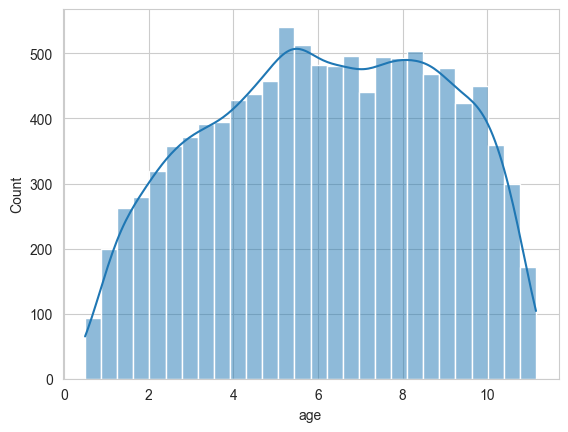

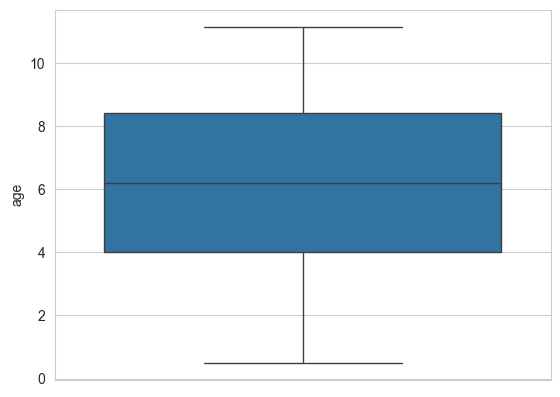

In [36]:
#visualise histograms and boxplots
sns.histplot(data2['age'], kde=True)
plt.show()

sns.boxplot(data2['age'])
plt.show()

In [29]:
#round age to two decimal places
data2['age'] = data2['age'].round(2)

# Convert 'date' column to datetime format
data2['date'] = pd.to_datetime(data2['date'], dayfirst=True)

# Convert 'visittype2', 'sex', and 'febrile' to categorical variables
data2['visittype2'] = data2['visittype2'].astype('category')
data2['sex'] = data2['sex'].astype('category')
data2['febrile'] = data2['febrile'].astype('category')

print(data2.dtypes)

id                          int64
hhid                        int64
date               datetime64[ns]
age                       float64
sex                      category
visittype2               category
febrile                  category
parasitedensity             int64
dtype: object


In [30]:
#categorizing age
conditions = [
    (data2['age'] >= data2['age'].min()) & (data2['age'] <= 2.999),  # 6mo-2years
    (data2['age'] >= 3.00) & (data2['age'] <= 5.999),               # 3-5 years
    (data2['age'] >= 6.00)                                       # 6-12 years
]

# Define the category labels for each condition
labels = ['6mo-2years', '3-5 years', '6-12 years']

# Apply the conditions and labels to create the 'agecat' column
data2['agecat'] = np.select(conditions, labels)

data2['agecat'] = data2['agecat'].astype('category')
# display the frequency of each age category
data2['agecat'].value_counts()

6-12 years    5808
3-5 years     3558
6mo-2years    1720
Name: agecat, dtype: int64

In [31]:
# create Malaria column category if parasitedensity > 0
data2['malaria'] = np.where(data2['parasitedensity'] > 0, 'Yes', 'No')
data2['malaria'] = data2['malaria'].astype('category')

In [32]:
data2

,id,hhid,date,age,sex,visittype2,febrile,parasitedensity,agecat,malaria
0,2002,442004603,2011-08-21,4.27,Female,Routine,No,0,3-5 years,No
1,2002,442004603,2011-10-17,4.43,Female,Not Routine,Yes,0,3-5 years,No
2,2002,442004603,2011-11-14,4.51,Female,Routine,No,0,3-5 years,No
3,2004,442000701,2011-08-21,0.50,Male,Routine,No,0,6mo-2years,No
4,2004,442000701,2011-11-14,0.73,Male,Routine,No,0,6mo-2years,No
...,...,...,...,...,...,...,...,...,...,...
11081,2491,362004501,2016-06-27,1.22,Male,Routine,No,0,6mo-2years,No
11082,2492,402003501,2015-11-04,0.65,Female,Routine,No,0,6mo-2years,No
11083,2492,402003501,2016-02-02,0.90,Female,Routine,No,0,6mo-2years,No
11084,2492,402003501,2016-02-12,0.93,Female,Not Routine,Yes,3200,6mo-2years,Yes


In [33]:
#display the frequency of each malaria category
data2['malaria'].value_counts()

No     7968
Yes    3118
Name: malaria, dtype: int64

In [132]:
df = pd.read_stata ("D:\ACADEMIA\Research\IDRC\malaria stata.dta ")
df.head()

,v1,id,hhid,age,parasitedensity,newdate,Sex,Visittype,Febrile,Malaria_positive,...,symptomatic_malaria,symptomatic_followup_time,tag_id,total_participants,year,month,year_month,y_m,noncases_followup_time,followup_time
0,11101,2002,442004603,4.273973,0,2011-08-21,Female,Routine,No,0.0,...,0.0,NaN,0,309.0,2011.0,8.0,2011_08,2011_08,385278.0,0.0
1,11102,2002,442004603,4.430137,0,2011-10-17,Female,Not Routine,Yes,0.0,...,0.0,NaN,0,309.0,2011.0,10.0,2011_10,2011_10,385278.0,57.0
2,11103,2002,442004603,4.506849,0,2011-11-14,Female,Routine,No,0.0,...,0.0,NaN,0,309.0,2011.0,11.0,2011_11,2011_11,385278.0,28.0
3,11129,2004,442000701,0.498630,0,2011-08-21,Male,Routine,No,0.0,...,0.0,NaN,0,309.0,2011.0,8.0,2011_08,2011_08,385278.0,0.0
4,11131,2004,442000701,0.731507,0,2011-11-14,Male,Routine,No,0.0,...,0.0,NaN,0,309.0,2011.0,11.0,2011_11,2011_11,385278.0,85.0


In [50]:
#df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11086 entries, 0 to 11085
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   v1                         11086 non-null  int16         
 1   id                         11086 non-null  int16         
 2   hhid                       11086 non-null  int32         
 3   age                        11086 non-null  float32       
 4   parasitedensity            11086 non-null  int32         
 5   newdate                    11086 non-null  datetime64[ns]
 6   Sex                        11086 non-null  category      
 7   Visittype                  11086 non-null  category      
 8   Febrile                    11086 non-null  category      
 9   Malaria_positive           11086 non-null  float32       
 10  agecat                     11086 non-null  category      
 11  tag_id_all                 11086 non-null  int8          
 12  tota

In [133]:
#label month 1-12 to Jan-Dec
df['month'] = df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [134]:
#label year 2011-2016 to 2011-2016
df['year'] = df['year'].map({2011: '2011', 2012: '2012', 2013: '2013', 2014: '2014', 2015: '2015', 2016: '2016'})

In [135]:
#display the frequency of each month
df['month'].value_counts()

May    1305
Nov    1184
Aug    1126
Feb    1111
Jun     969
Dec     908
Sep     866
Apr     812
Mar     797
Oct     718
Jan     688
Jul     602
Name: month, dtype: int64

In [136]:
#display the frequency of each year
df['year'].value_counts()

2015    3122
2014    2295
2013    2117
2012    1877
2011     843
2016     832
Name: year, dtype: int64

In [137]:
#make month and year categorical
df['month'] = df['month'].astype('category')
df['year'] = df['year'].astype('category')

In [138]:
#create a dataframe with the number of symptomatic_malaria cases per month  
df2 = df.groupby([ 'month']).agg({'symptomatic_malaria': 'sum'}).reset_index()
df2

,month,symptomatic_malaria
0,Apr,220.0
1,Aug,122.0
2,Dec,216.0
3,Feb,141.0
4,Jan,197.0
5,Jul,156.0
6,Jun,340.0
7,Mar,108.0
8,May,348.0
9,Nov,239.0


C:\Users\DollarBill\AppData\Local\Temp\ipykernel_15780\660366368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='symptomatic_malaria', data=df2, palette='viridis')


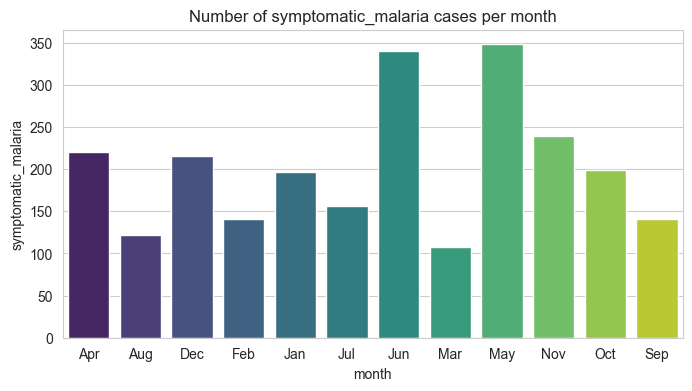

In [139]:
#plot the number of symptomatic_malaria cases per month
plt.figure(figsize=(8, 4))
sns.barplot(x='month', y='symptomatic_malaria', data=df2, palette='viridis')
plt.title('Number of symptomatic_malaria cases per month')
plt.show()

In [77]:
#create a dataframe with the number of symptomatic_malaria cases per year
df3 = df.groupby([ 'year']).agg({'symptomatic_malaria': 'sum'}).reset_index()
df3

,year,symptomatic_malaria
0,2011,98.0
1,2012,319.0
2,2013,612.0
3,2014,610.0
4,2015,501.0
5,2016,287.0


#plot the number of symptomatic_malaria cases per year with different colors


In [112]:
##  Group by month and calculate the proportion of symptomatic malaria cases
symptomatic_monthly_data = df.groupby('month').agg(
    symptomatic_cases=('symptomatic_malaria', 'sum'),
    total_cases=('id', 'count')
).reset_index()

symptomatic_monthly_data['proportion'] = round(symptomatic_monthly_data['symptomatic_cases'] / symptomatic_monthly_data['total_cases']*100,1)

# Sorting the months in calendar order
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
symptomatic_monthly_data['month'] = pd.Categorical(symptomatic_monthly_data['month'], categories=months_order, ordered=True)

symptomatic_monthly_data = symptomatic_monthly_data.sort_values('month')

symptomatic_monthly_data

,month,symptomatic_cases,total_cases,proportion
4,Jan,197.0,688,28.6
3,Feb,141.0,1111,12.7
7,Mar,108.0,797,13.6
0,Apr,220.0,812,27.1
8,May,348.0,1305,26.7
6,Jun,340.0,969,35.1
5,Jul,156.0,602,25.9
1,Aug,122.0,1126,10.8
11,Sep,141.0,866,16.3
10,Oct,199.0,718,27.7


C:\Users\DollarBill\AppData\Local\Temp\ipykernel_15780\2098111871.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=symptomatic_monthly_data, x='month', y='proportion', marker='o', palette='bright', color='green')


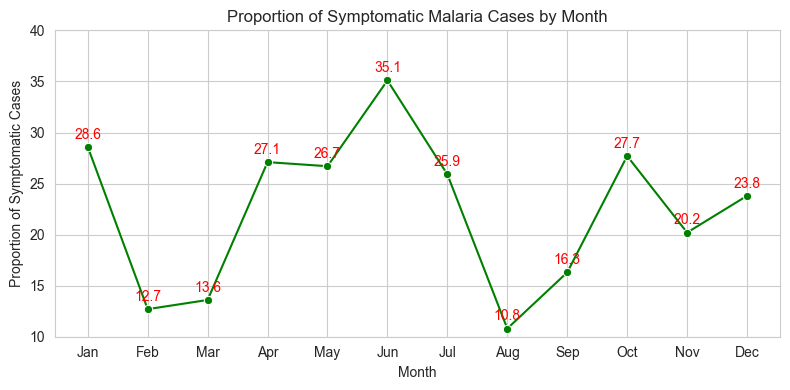

In [121]:
#plot a line graph of percentage of symptomatic cases per month with data labels and value at each point
plt.figure(figsize=(8, 4))
sns.lineplot(data=symptomatic_monthly_data, x='month', y='proportion', marker='o', palette='bright', color='green')

# Iterate through the data points and add text labels
for index, row in symptomatic_monthly_data.iterrows():
    plt.text(row['month'], row['proportion']+0.5, f"{row['proportion']:.1f}", color='red', ha="center", va = "bottom")

plt.title('Proportion of Symptomatic Malaria Cases by Month')
plt.xlabel('Month')
plt.ylabel('Proportion of Symptomatic Cases')
plt.ylim(10, 40)
plt.grid(True)
plt.tight_layout()

plt.show()


In [102]:
# Group by year and calculate the total and symptomatic cases
total_cases = df.groupby('year').size().rename('total_cases')
symptomatic_cases = df[df['symptomatic_malaria'] == 1].groupby('year').size().rename('symptomatic_cases')

# Combine the series into a DataFrame
yearly_summary = pd.DataFrame({'total_cases': total_cases, 'symptomatic_cases': symptomatic_cases})

# Calculate the percentage of symptomatic cases per year
yearly_summary['percentage_symptomatic'] = round((yearly_summary['symptomatic_cases'] / yearly_summary['total_cases']) * 100,1)

# Reset the index to have 'year' as a column
yearly_summary.reset_index(inplace=True)
yearly_summary


,year,total_cases,symptomatic_cases,percentage_symptomatic
0,2011,843,98,11.6
1,2012,1877,319,17.0
2,2013,2117,612,28.9
3,2014,2295,610,26.6
4,2015,3122,501,16.0
5,2016,832,287,34.5


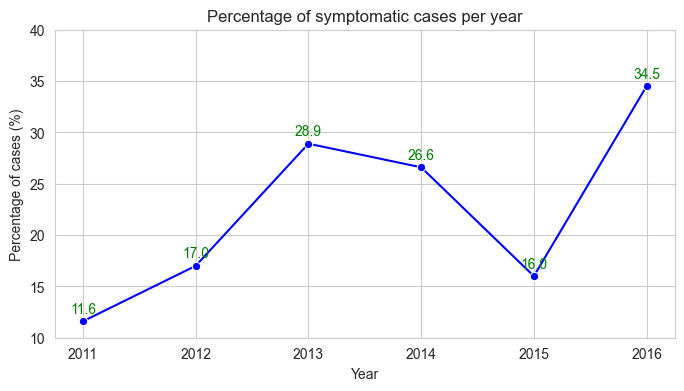

In [122]:
#plot a line graph of percentage of symptomatic cases per year with data labels and value at each point
plt.figure(figsize=(8, 4))
lineplot = sns.lineplot(x='year', y='percentage_symptomatic', data=yearly_summary, marker='o', color='blue')
plt.title('Percentage of symptomatic cases per year')
plt.ylim(10, 40)
plt.xlabel('Year')
plt.ylabel('Percentage of cases (%)')

# Iterate through the data points and add text labels
for index, row in yearly_summary.iterrows():
    plt.text(row['year'], row['percentage_symptomatic']+0.5, f"{row['percentage_symptomatic']:.1f}", color='green', ha="center", va = "bottom")

plt.show()

In [123]:
# Group by year_month and calculate the total and symptomatic cases
total_cases = df.groupby('year_month').size().rename('total_cases')
symptomatic_cases = df[df['symptomatic_malaria'] == 1].groupby('year_month').size().rename('symptomatic_cases')

# Combine the series into a DataFrame
monthly_summary = pd.DataFrame({'total_cases': total_cases, 'symptomatic_cases': symptomatic_cases})

# Calculate the percentage of symptomatic cases per year_month
monthly_summary['percentage_symptomatic'] = round((monthly_summary['symptomatic_cases'] / monthly_summary['total_cases']) * 100,1)

# Reset the index to have 'year_month' as a column
monthly_summary.reset_index(inplace=True)
monthly_summary

,year_month,total_cases,symptomatic_cases,percentage_symptomatic
0,2011_08,103,2,1.9
1,2011_09,243,25,10.3
2,2011_10,100,30,30.0
3,2011_11,225,22,9.8
4,2011_12,172,19,11.0
5,2012_01,92,26,28.3
6,2012_02,260,20,7.7
7,2012_03,139,7,5.0
8,2012_04,53,15,28.3
9,2012_05,298,28,9.4


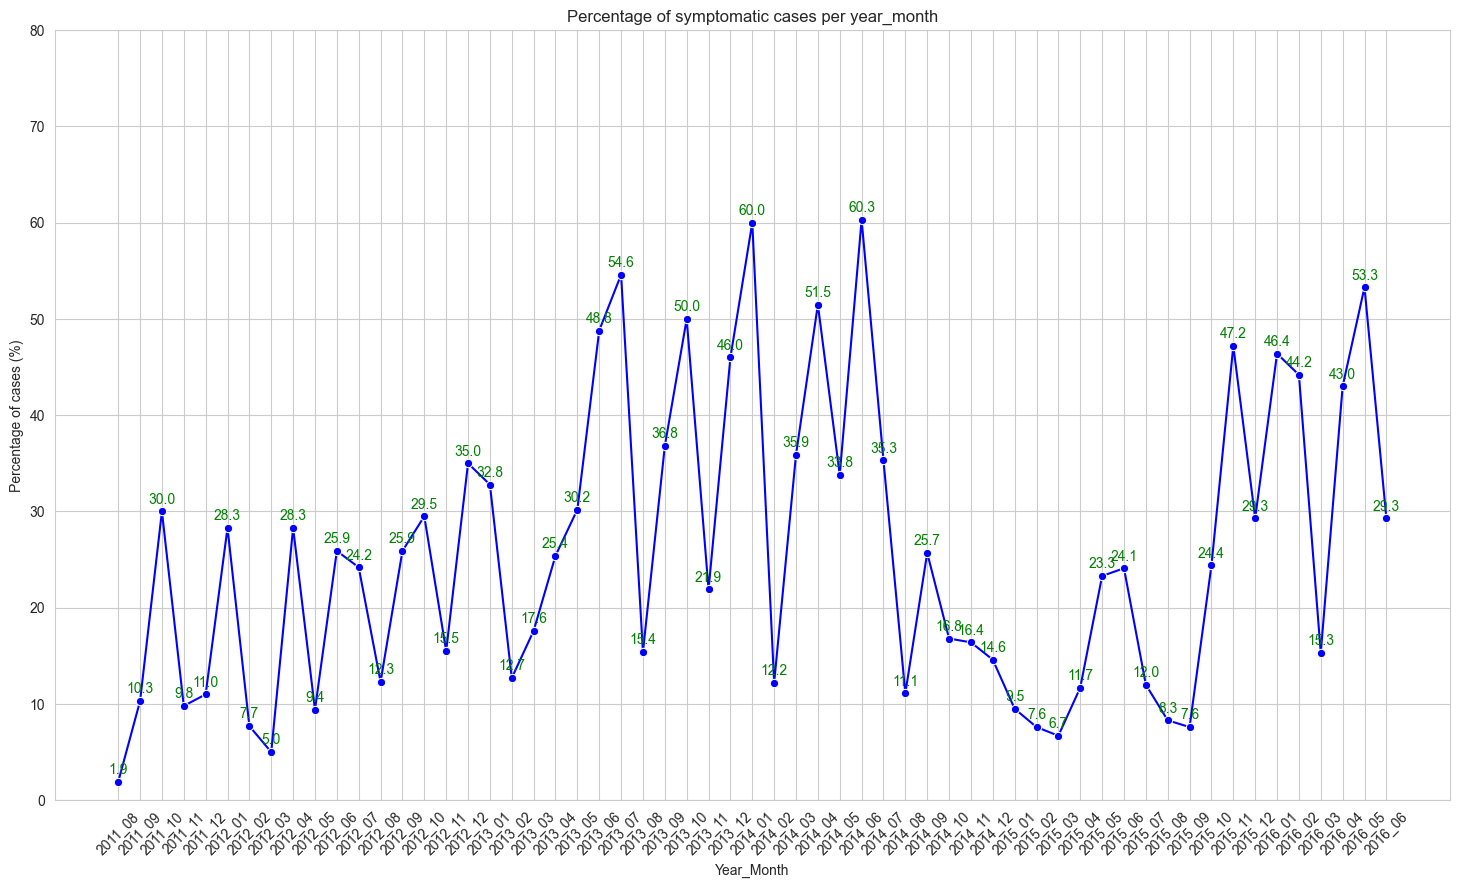

In [131]:
#plot a line graph of percentage of symptomatic cases per year_month with data labels and value at each point
plt.figure(figsize=(18, 10))
lineplot = sns.lineplot(x='year_month', y='percentage_symptomatic', data=monthly_summary, marker='o', color='blue')
plt.title('Percentage of symptomatic cases per year_month')
plt.ylim(0, 80)
plt.xlabel('Year_Month')
plt.ylabel('Percentage of cases (%)')
plt.xticks(rotation=45)

# Iterate through the data points and add text labels
for index, row in monthly_summary.iterrows():
    plt.text(row['year_month'], row['percentage_symptomatic']+0.5, f"{row['percentage_symptomatic']:.1f}", color='green', ha="center", va = "bottom")
    
plt.show()
